In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

In [3]:
def f(x, A, k):
    return A * sin(k * x)

In [4]:
x = [(random.uniform(-3 * pi, 3 * pi)) for i in range(100)]
y = [(f(x[i], 3, 0.5) + random.gauss(-0.5, 0.5)) for i in range(100)] # A = 3, k = 0.5

print(len(y))
print(type(y))

100
<class 'list'>


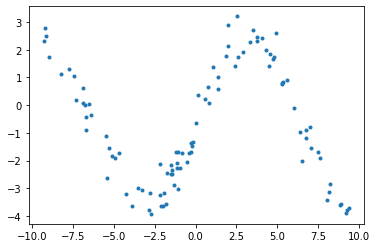

In [5]:
plt.plot(x, y, '.')
plt.show()

In [6]:
bestK = 0
bestA = 0
bestLoss = 1e9

dt = 0.001
lossHistory = []
kHistory = []
AHistory = []

k = 0.9
A = 5

for i in range(10000):
    kGrad = [-2 * (y[i] - f(x[i], A, k)) * A * x[i] * cos(k*x[i]) for i in range(len(y))]
    AGrad = [-2 * (y[i] - f(x[i], A ,k)) * sin(k * x[i]) for i in range(len(y))]

    k -= sum(kGrad) / len(kGrad) * dt
    A -= sum(AGrad) / len(AGrad) * dt

    reses = [(y[i] - f(x[i], A, k)) ** 2 for i in range(len(y))]
    loss = sqrt(sum(reses) / len(reses))

    kHistory.append(k)
    AHistory.append(A)
    lossHistory.append(loss)

    if loss < bestLoss:
        bestK = k
        bestA = A
        bestLoss = loss

print(bestK, bestA, bestLoss)

0.4978856661985609 3.0337484314052636 0.7599349687927809


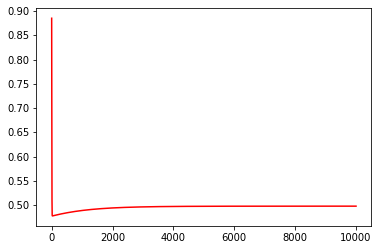

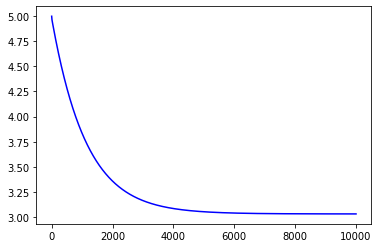

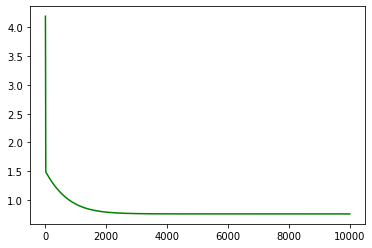

In [7]:
plt.plot(kHistory, 'r')
plt.show()
plt.plot(AHistory, 'b')
plt.show()
plt.plot(lossHistory, 'g')
plt.show()

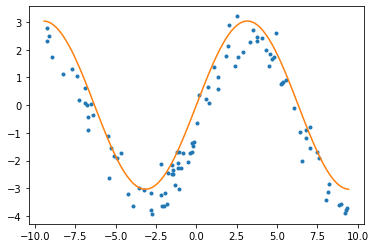

In [8]:
plt.plot(x, y, '.')
xForPlot = np.linspace(-3 * pi, 3 * pi, 100)
yForPlot = np.zeros([100], float)
for i in range(len(yForPlot)):
    yForPlot[i] = f(xForPlot[i], bestA, bestK)

plt.plot(xForPlot, yForPlot, '-')
plt.show()